# Red Wine Classification Proposal
### By DSCI 100, Group 39

## Introduction

For our project, we will be looking at the quality of red wine and the factors that create balance. A higher-quality wine has all of its components balanced, whereas a lower-quality wine has an element that stands out more than the rest. We are trying to answer the question: how can we predict the quality of wine using its physicochemical factors? We will be using a dataset collected from 1599 samples of the red variant of Vinho Verde. The dataset contains 12 elements: fixed quality, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, pH, sulfates, alcohol, and quality. 



## Preliminary Exploratory Data Analysis

In [95]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

In [96]:
#read the dataset in Jupyter
red_wine <- read.csv2("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv")
red_wine

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
6.3,0.51,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11,6
5.9,0.645,0.12,2,0.075,32,44,0.99547,3.57,0.71,10.2,5
6,0.31,0.47,3.6,0.067,18,42,0.99549,3.39,0.66,11,6


In [97]:
#make quality (originally ranked from 1-10) a categorical variable 
red_wine <- red_wine %>%
    mutate(quality = case_when(quality == "10" ~ "Excellent",
                              quality == "9" ~ "Excellent",
                              quality == "8" ~ "Good",
                              quality == "7" ~ "Good",
                              quality == "6" ~ "Satisfactory",
                              quality == "5" ~ "Satisfactory",
                              quality == "4" ~ "Bad",
                              quality == "3" ~ "Bad",
                              quality == "2" ~ "Poor",
                              quality == "1" ~ "Poor"))

In [98]:
#we will be treating quality as a categorical variable, so we converted into a factor
#we converted the rest of the variables into numerical variables
red_wine <- red_wine %>% 
    mutate(fixed.acidity = as.numeric(fixed.acidity)) %>% 
    mutate(volatile.acidity = as.numeric(volatile.acidity)) %>% 
    mutate(citric.acid = as.numeric(citric.acid)) %>% 
    mutate(residual.sugar = as.numeric(residual.sugar)) %>% 
    mutate(chlorides = as.numeric(chlorides)) %>% 
    mutate(free.sulfur.dioxide = as.numeric(free.sulfur.dioxide)) %>% 
    mutate(total.sulfur.dioxide = as.numeric(total.sulfur.dioxide)) %>% 
    mutate(density = as.numeric(density)) %>% 
    mutate(pH = as.numeric(pH)) %>% 
    mutate(sulphates = as.numeric(sulphates)) %>% 
    mutate(alcohol = as.numeric(alcohol)) %>% 
    mutate(quality = as.factor(quality))

In [99]:
#create a filtered dataset by quality for each classification
#note that red_wine has no inputs for "Excellent" and "Poor"
good_class <- red_wine %>% 
    filter(quality == "Good")
good_class

satisfactory_class <- red_wine %>% 
    filter(quality == "Satisfactory")
satisfactory_class

bad_class <- red_wine %>% 
    filter(quality == "Bad")
bad_class

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
7.3,0.65,0.00,1.2,0.065,15,21,0.9946,3.39,0.47,10.0,Good
7.8,0.58,0.02,2.0,0.073,9,18,0.9968,3.36,0.57,9.5,Good
8.5,0.28,0.56,1.8,0.092,35,103,0.9969,3.30,0.75,10.5,Good
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
7.4,0.36,0.30,1.8,0.074,17,24,0.99419,3.24,0.70,11.40,Good
7.0,0.56,0.17,1.7,0.065,15,24,0.99514,3.44,0.68,10.55,Good
6.7,0.32,0.44,2.4,0.061,24,34,0.99484,3.29,0.80,11.60,Good


fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,Satisfactory
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,Satisfactory
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,Satisfactory
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
6.3,0.510,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11.0,Satisfactory
5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,Satisfactory
6.0,0.310,0.47,3.6,0.067,18,42,0.99549,3.39,0.66,11.0,Satisfactory


fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
7.4,0.59,0.08,4.4,0.086,6,29,0.9974,3.38,0.50,9.0,Bad
5.7,1.13,0.09,1.5,0.172,7,19,0.9940,3.50,0.48,9.8,Bad
8.8,0.61,0.30,2.8,0.088,17,46,0.9976,3.26,0.51,9.3,Bad
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
6.8,0.91,0.06,2.0,0.060,4,11,0.99592,3.53,0.64,10.90,Bad
6.7,0.76,0.02,1.8,0.078,6,12,0.99600,3.55,0.63,9.95,Bad
6.9,0.48,0.20,1.9,0.082,9,23,0.99585,3.39,0.43,9.05,Bad


In [100]:
#print the number of good, satisfactory, and bad classifications from the dataset
good_class_rows <- nrow(good_class)
print(good_class_rows)

satisfactory_class_rows <- nrow(satisfactory_class)
print(satisfactory_class_rows)

bad_class_rows <- nrow(bad_class)
print(bad_class_rows)

[1] 217
[1] 1319
[1] 63


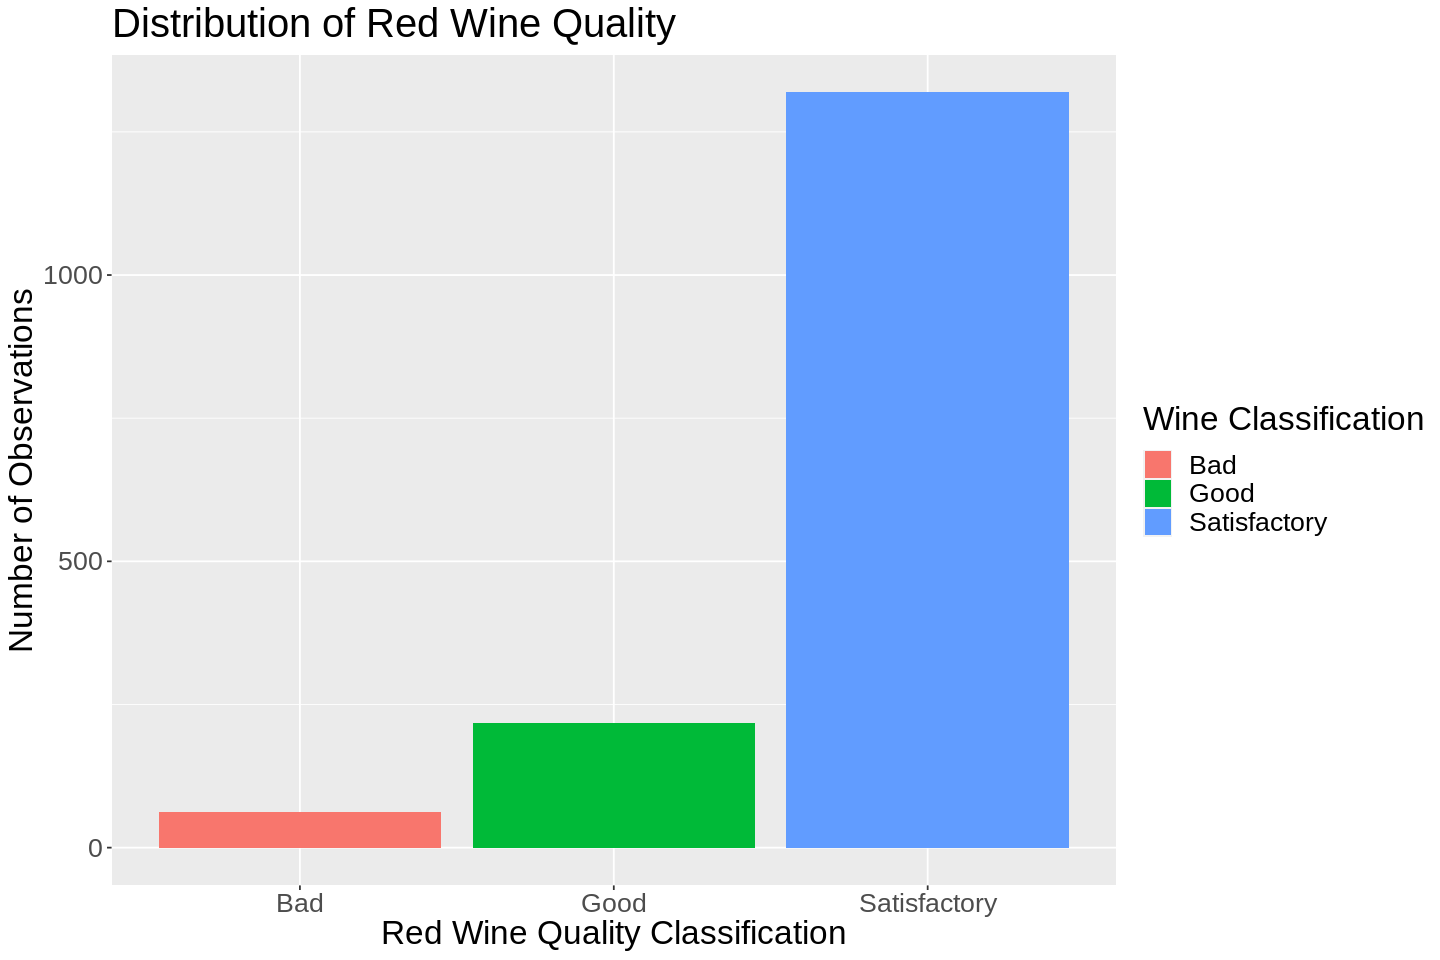

In [101]:
#create a bar graph to compare the amount of observations within each quality classification
options(repr.plot.width = 12, repr.plot.height = 8)
quality_distribution <- red_wine %>% 
    ggplot(aes(x = quality, fill = quality)) +
    geom_bar() +
    labs(x = "Red Wine Quality Classification", y = "Number of Observations", fill = "Wine Classification") +
    ggtitle("Distribution of Red Wine Quality") +
    theme(text = element_text(size = 20))
quality_distribution

## Methods

We will conduct our data analysis using all variables because they all matter for red wine quality, and we want to know how to balance the variables for excellent quality. We will have quality as the prediction result. All factors, except quality, are collected using physicochemical tests. We will be creating a model that allows us to classify the wine's quality in five categories, given its other eleven properties. The five types are: 
- Excellent wine quality: score of 9 and 10
- Good wine quality: score of 7 and 8
- Satisfactory wine quality: score of 5 and 6
- Bad wine quality: score of 3 and 4
- Poor wine quality: score 1 and 2

To conduct the analysis, we will split our data into training data and testing data to avoid violating the golden rule. For training data, we will do cross-validation to ensure we can use all of our data in the training set. We use the K nearest neighbors model to predict the result. The hyperparameter of this model will be tuned to get the best outcome during cross-validation. Once we get our best model, we will predict the result on the testing data and compare it to our true quality to see this model's accuracy. The data will be visualized using a line graph to show accuracy vs. the K nearest neighbors to see how K affects our prediction accuracy.

## Expected Outcomes and Significance

We expect to create a model that classifies a bottle of wine based on its chemical properties and identifies the accuracy with which it makes these predictions. Our result can have significance for various shareholders such as direct consumers, retailers, and wine critics. 
Our findings would impact the wine industry's production methods and quality assurance methods. If a standardized model is created, wine producers can rely on the model instead of a wine taster. Manufacturers can alter their wines' chemical constituents to ensure that their values lie within a very excellent range (as predicted by our model). Consumers' lives would be impacted because they would know which red-wine labels buy without tasting them. If the model is accurate, wine critics' importance will reduce as their role would only be limited to providing observations to improve our model. 
The resulting questions from our analysis could be, would the model derive results of the same level of accuracy and applicability for other types of wines? Is the method limited to specific sensory and subjective ranking procedures, and what would we define these limitations by? Can the model fully automate the quality testing process for red wine production?